# Fisher Analysis
In this notebook we explore the Fisher metric with quantized models.

In [1]:
%reload_ext autoreload
%autoreload 2

import torch
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
import ast
import os
import sys
from statistics import mean




# import modules from JTAG model
module_path = os.path.abspath(os.path.join('../../workspace/models/jets/code/')) # or the path to your source code
sys.path.insert(0, module_path)
import model as jet_tagger
import jet_datamodule

# import modules from ECON model
module_path = os.path.abspath(os.path.join('../../workspace/models/econ/code/')) # or the path to your source code
sys.path.insert(0, module_path)
import q_autoencoder as econ
import autoencoder_datamodule

# import modules from common metrics
module_path = os.path.abspath(os.path.join('../../workspace/common/metrics/')) # or the path to your source code
sys.path.insert(0, module_path)
from fisher import FIT



## Utility methods

In [2]:
def plot_2d_heatmap(values, 
                    title, 
                    min_max=(0, 1), 
                    x_label='Layers', 
                    y_label='Layers', 
                    scale_label='Value', 
                    cmap='Greens',
                    show_value=True):
    '''
    Method used to plot a 2D heatmap using Seaborn.
    '''
    # Set up the figure and axes
    plt.figure(figsize=(7, 6))

    # Create a heatmap using Seaborn
    sns.heatmap(values, 
                cmap=cmap, 
                annot=show_value, 
                fmt=".2f", 
                vmin=min_max[0], 
                vmax=min_max[1],
                cbar_kws={'label': scale_label})

    # Customize the plot
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Display the plot
    plt.show()
    
def plot_fisher_trace_per_layer(value, 
                                title, 
                                x_label='Layers', 
                                y_label='Fisher trace'):
    plt.figure(figsize=(12,6))
    
    plt.bar(value.keys(), 
            value.values())

    plt.ylim(0, 1)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Display the plot
    plt.show()

In [3]:
# search space
batch_sizes = [16, 32, 64, 128, 256, 512, 1024]
learning_rates = [0.1, 0.05, 0.025, 0.0125, 0.00625, 0.003125, 0.0015625]
precisions = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

# ECON model (Autoencoder)
we focus our analysis on the encoder which will be deploy on an ASIC.

In [4]:
DATA_PATH = '/home/jovyan/checkpoint/'
DATASET_DIR = '../../data/ECON/Elegun'
DATASET_FILE = 'nELinks5.npy'

size = 'baseline'
ECON_layers = ['encoder.conv', 'encoder.enc_dense']

precisions = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
learning_rates = [0.1, 0.05, 0.025, 0.0125, 0.00625, 0.003125, 0.0015625]


In [5]:
def get_estimated_fisher(batch_size, 
                         learning_rate, 
                         precision,
                         size, 
                         dataloader,
                         min_it=100,
                         max_it=1000,
                         load=True):
    '''
    Get the value of the Fisher matrix
    '''
    
    # path to the directory
    path = os.path.join(
        DATA_PATH, 
        f'bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}/'
    )
    
    # load the model and the performance
    model, emd = econ.load_model(DATA_PATH, batch_size, learning_rate, precision, size)
    
    # instantiate the metric
    metric = FIT(model, 
                 dataloader, 
                 input_spec=(batch_size, 1, 8, 8),
                 target_layers=ECON_layers)
    
    # try to load the result
    if load:
        if metric.load_from_file(path):
            return metric.results
        else:
            print("Information not stored in ", path)
    
    # compute the result and store it
    result = metric.EF(min_iterations=min_it, max_iterations=max_it)
    metric.save_on_file(path=path)
    
    return result

## Results

Neural efficiency require to process an input sample per time. 

In [6]:
noise = 5 # 5 10 15 20
noise_type = 'gaussian'

<built-in method type of Tensor object at 0x7fcd2178ec70>
<built-in method type of Tensor object at 0x7fccc75ba590>
<built-in method type of Tensor object at 0x7fccc75b0b80>
<built-in method type of Tensor object at 0x7fccc75b0810>
<built-in method type of Tensor object at 0x7fccc75c1cc0>
<built-in method type of Tensor object at 0x7fcd217aa8b0>
<built-in method type of Tensor object at 0x7fccc75c1ea0>
<built-in method type of Tensor object at 0x7fccc75b0b30>
<built-in method type of Tensor object at 0x7fccc75b0630>
<built-in method type of Tensor object at 0x7fccc75ba8b0>
<built-in method type of Tensor object at 0x7fccc75c1b80>
<built-in method type of Tensor object at 0x7fccc75c1f40>
<built-in method type of Tensor object at 0x7fcd217aa720>
<built-in method type of Tensor object at 0x7fcd2178e3b0>
<built-in method type of Tensor object at 0x7fccc75b0720>
<built-in method type of Tensor object at 0x7fccc75b08b0>
<built-in method type of Tensor object at 0x7fcd2178ea40>
<built-in meth

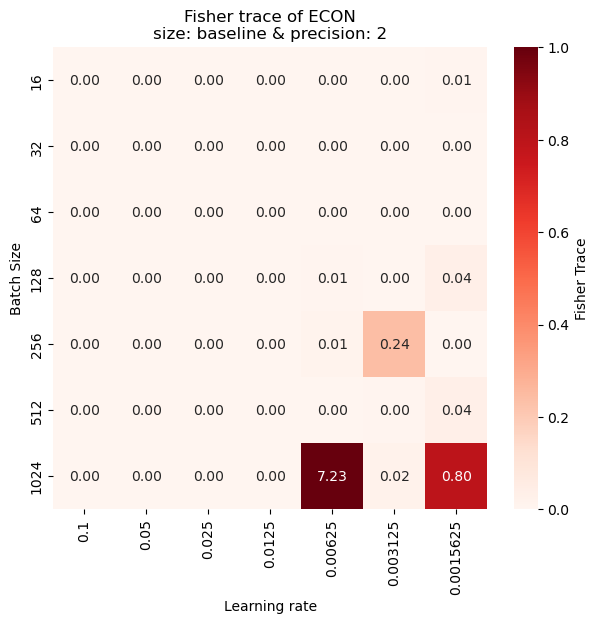

<built-in method type of Tensor object at 0x7fcce10f0130>
<built-in method type of Tensor object at 0x7fcce1123ef0>
<built-in method type of Tensor object at 0x7fccc75c1d60>
<built-in method type of Tensor object at 0x7fcce10f00e0>
<built-in method type of Tensor object at 0x7fcce10f0180>
<built-in method type of Tensor object at 0x7fccc75d9270>
<built-in method type of Tensor object at 0x7fcce10f04f0>
<built-in method type of Tensor object at 0x7fcce115dd60>
<built-in method type of Tensor object at 0x7fcce10f03b0>
<built-in method type of Tensor object at 0x7fcce10f0770>
<built-in method type of Tensor object at 0x7fcce10f07c0>
<built-in method type of Tensor object at 0x7fcce10f0950>
<built-in method type of Tensor object at 0x7fcce10f01d0>
<built-in method type of Tensor object at 0x7fccc75e1450>
<built-in method type of Tensor object at 0x7fcce10f0900>
<built-in method type of Tensor object at 0x7fcce10f0ef0>
<built-in method type of Tensor object at 0x7fcce10f0270>
<built-in meth

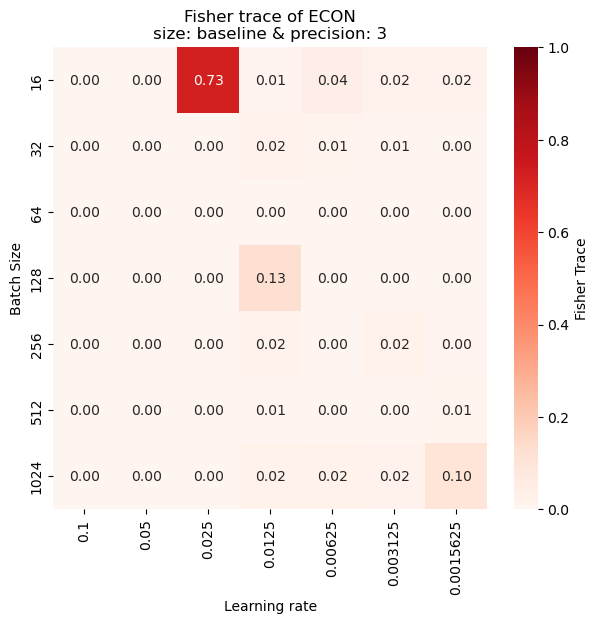

<built-in method type of Tensor object at 0x7fcce1174a40>
<built-in method type of Tensor object at 0x7fcce1174d10>
<built-in method type of Tensor object at 0x7fcce10f0d60>
<built-in method type of Tensor object at 0x7fcce116c810>
<built-in method type of Tensor object at 0x7fcce11744a0>
<built-in method type of Tensor object at 0x7fcce11073b0>
<built-in method type of Tensor object at 0x7fcce116cae0>
<built-in method type of Tensor object at 0x7fcce1174f90>
<built-in method type of Tensor object at 0x7fcce116cf40>
<built-in method type of Tensor object at 0x7fcce11074f0>
<built-in method type of Tensor object at 0x7fcce116c270>
<built-in method type of Tensor object at 0x7fcce11078b0>
<built-in method type of Tensor object at 0x7fcce116c770>
<built-in method type of Tensor object at 0x7fcce116c9f0>
<built-in method type of Tensor object at 0x7fcce116c590>
<built-in method type of Tensor object at 0x7fcce116c130>
<built-in method type of Tensor object at 0x7fcce116c860>
<built-in meth

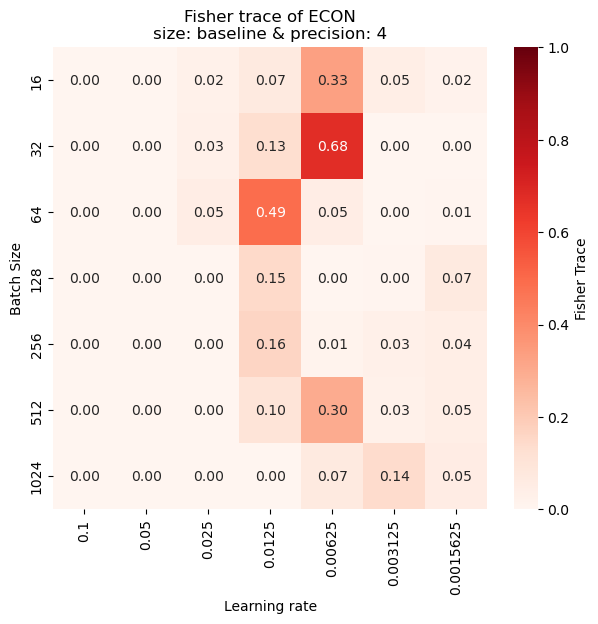

<built-in method type of Tensor object at 0x7fcce0fa7ae0>
<built-in method type of Tensor object at 0x7fcce0fa7a90>
<built-in method type of Tensor object at 0x7fcce1170860>
<built-in method type of Tensor object at 0x7fcce11705e0>
<built-in method type of Tensor object at 0x7fcce0fa7540>
<built-in method type of Tensor object at 0x7fcce0fa70e0>
<built-in method type of Tensor object at 0x7fcce0fa7860>
<built-in method type of Tensor object at 0x7fcce0fa7630>
<built-in method type of Tensor object at 0x7fcce0fa7400>
<built-in method type of Tensor object at 0x7fcce0fb8a90>
<built-in method type of Tensor object at 0x7fcce0fb80e0>
<built-in method type of Tensor object at 0x7fcce0fb8590>
<built-in method type of Tensor object at 0x7fcce0fa79a0>
<built-in method type of Tensor object at 0x7fcce0fa7040>
<built-in method type of Tensor object at 0x7fcce0fa7ae0>
<built-in method type of Tensor object at 0x7fcce0fb8c20>
<built-in method type of Tensor object at 0x7fcce116cc20>
<built-in meth

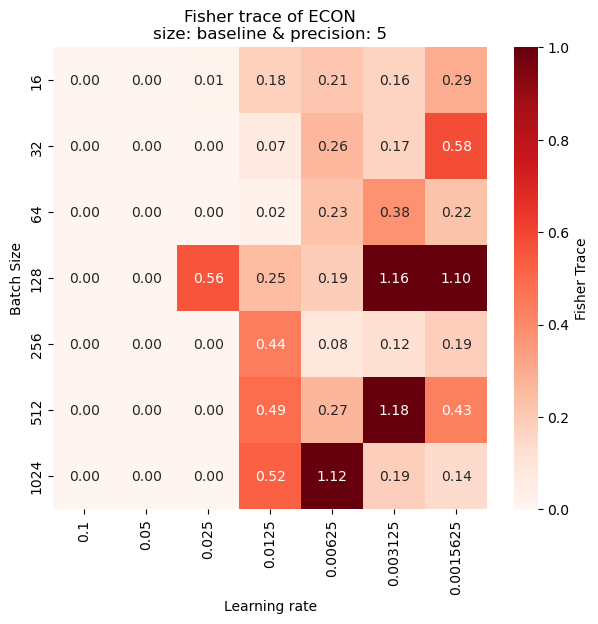

<built-in method type of Tensor object at 0x7fccdf6d9b30>
<built-in method type of Tensor object at 0x7fccdf6d36d0>
<built-in method type of Tensor object at 0x7fcce0fad540>
<built-in method type of Tensor object at 0x7fccdf6d1860>
<built-in method type of Tensor object at 0x7fccdf6d1ef0>
<built-in method type of Tensor object at 0x7fcce0fb8b30>
<built-in method type of Tensor object at 0x7fcce0fb8a40>
<built-in method type of Tensor object at 0x7fcce0fb8bd0>
<built-in method type of Tensor object at 0x7fccdf6d9b30>
<built-in method type of Tensor object at 0x7fccdf6d1d10>
<built-in method type of Tensor object at 0x7fccdf67a220>
<built-in method type of Tensor object at 0x7fccdf67adb0>
<built-in method type of Tensor object at 0x7fcce0fadae0>
<built-in method type of Tensor object at 0x7fccdf6d0860>
<built-in method type of Tensor object at 0x7fccdf6d1c20>
<built-in method type of Tensor object at 0x7fcce0fad8b0>
<built-in method type of Tensor object at 0x7fccdf67ab30>
<built-in meth

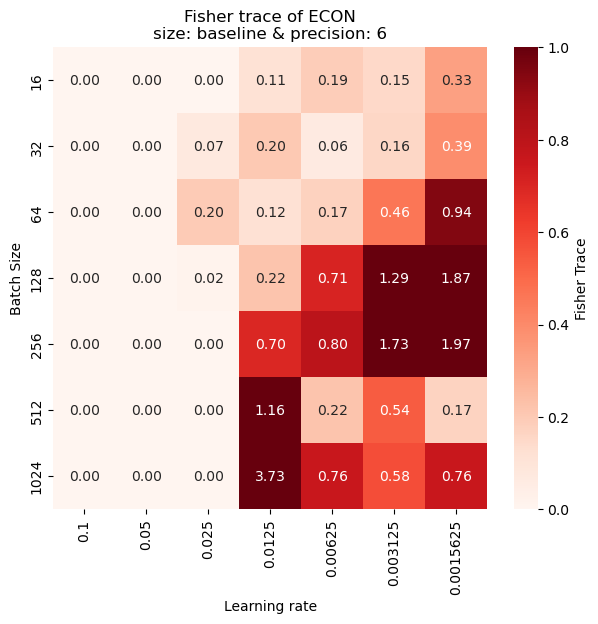

<built-in method type of Tensor object at 0x7fccdf58c1d0>
<built-in method type of Tensor object at 0x7fccdf58c3b0>
<built-in method type of Tensor object at 0x7fccdf66e900>
<built-in method type of Tensor object at 0x7fccdf66e900>
<built-in method type of Tensor object at 0x7fccdf66e040>
<built-in method type of Tensor object at 0x7fccdf61b950>
<built-in method type of Tensor object at 0x7fccdf59c590>
<built-in method type of Tensor object at 0x7fccdf6707c0>
<built-in method type of Tensor object at 0x7fccdf59c4f0>
<built-in method type of Tensor object at 0x7fccdf58c1d0>
<built-in method type of Tensor object at 0x7fccdf6d0810>
<built-in method type of Tensor object at 0x7fccdf59ce00>
<built-in method type of Tensor object at 0x7fccdf6d0f40>
<built-in method type of Tensor object at 0x7fccdf58c0e0>
<built-in method type of Tensor object at 0x7fccdf6d0360>
<built-in method type of Tensor object at 0x7fccdf59c9f0>
<built-in method type of Tensor object at 0x7fccdf59c130>
<built-in meth

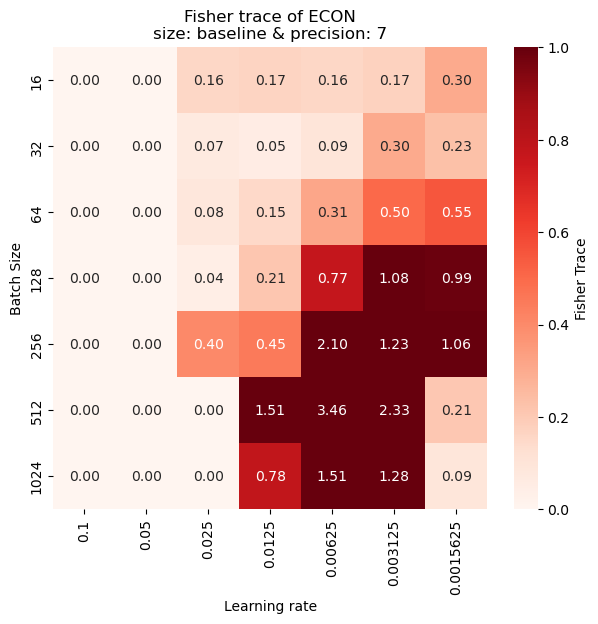

<built-in method type of Tensor object at 0x7fccdf43dc70>
<built-in method type of Tensor object at 0x7fccdf43dcc0>
<built-in method type of Tensor object at 0x7fccdf58bef0>
<built-in method type of Tensor object at 0x7fccdf593d10>
<built-in method type of Tensor object at 0x7fccdf454310>
<built-in method type of Tensor object at 0x7fccdf4c21d0>
<built-in method type of Tensor object at 0x7fccdf43d180>
<built-in method type of Tensor object at 0x7fccdf59c7c0>
<built-in method type of Tensor object at 0x7fccdf43dd60>
<built-in method type of Tensor object at 0x7fccdf4c21d0>
<built-in method type of Tensor object at 0x7fccdf43d0e0>
<built-in method type of Tensor object at 0x7fccdf59cdb0>
<built-in method type of Tensor object at 0x7fccdf43d1d0>
<built-in method type of Tensor object at 0x7fccdf593d10>
<built-in method type of Tensor object at 0x7fccdf59c310>
<built-in method type of Tensor object at 0x7fccdf58c630>
<built-in method type of Tensor object at 0x7fccdf43ddb0>
<built-in meth

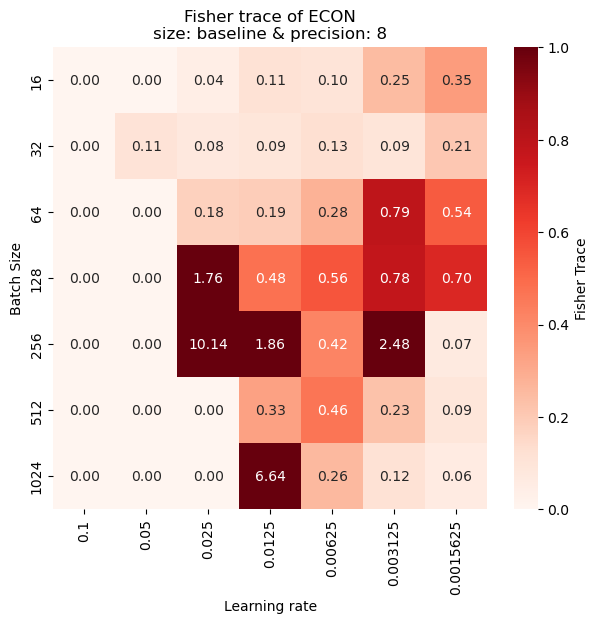

<built-in method type of Tensor object at 0x7fccdf2e41d0>
<built-in method type of Tensor object at 0x7fccdf2e4220>
<built-in method type of Tensor object at 0x7fccdf43da90>
<built-in method type of Tensor object at 0x7fccdf432d60>
<built-in method type of Tensor object at 0x7fccdf2e45e0>
<built-in method type of Tensor object at 0x7fccdf449450>
<built-in method type of Tensor object at 0x7fccdf4494f0>
<built-in method type of Tensor object at 0x7fccdf43d9f0>
<built-in method type of Tensor object at 0x7fccdf449180>
<built-in method type of Tensor object at 0x7fccdf2e4220>
<built-in method type of Tensor object at 0x7fccdf4499f0>
<built-in method type of Tensor object at 0x7fccdf432950>
<built-in method type of Tensor object at 0x7fccdf4320e0>
<built-in method type of Tensor object at 0x7fccdf2e44f0>
<built-in method type of Tensor object at 0x7fccdf2e4270>
<built-in method type of Tensor object at 0x7fccdf2e4220>
<built-in method type of Tensor object at 0x7fccdf2e4900>
<built-in meth

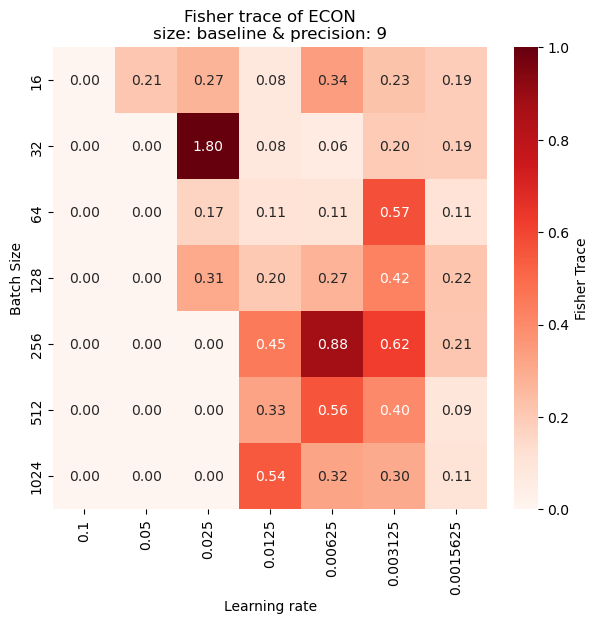

<built-in method type of Tensor object at 0x7fccdf20f770>
<built-in method type of Tensor object at 0x7fccdf35c770>
<built-in method type of Tensor object at 0x7fccdf317270>
<built-in method type of Tensor object at 0x7fccdf20f180>
<built-in method type of Tensor object at 0x7fccdf29b720>
<built-in method type of Tensor object at 0x7fccdf2e4630>
<built-in method type of Tensor object at 0x7fccdf317680>
<built-in method type of Tensor object at 0x7fccdf35cc20>
<built-in method type of Tensor object at 0x7fccdf317f90>
<built-in method type of Tensor object at 0x7fccdf317ea0>
<built-in method type of Tensor object at 0x7fccdf20f9a0>
<built-in method type of Tensor object at 0x7fccdf316950>
<built-in method type of Tensor object at 0x7fccdf20f180>
<built-in method type of Tensor object at 0x7fccdf20f130>
<built-in method type of Tensor object at 0x7fccdf1a3680>
<built-in method type of Tensor object at 0x7fccdf1a3b30>
<built-in method type of Tensor object at 0x7fccdf1a3680>
<built-in meth

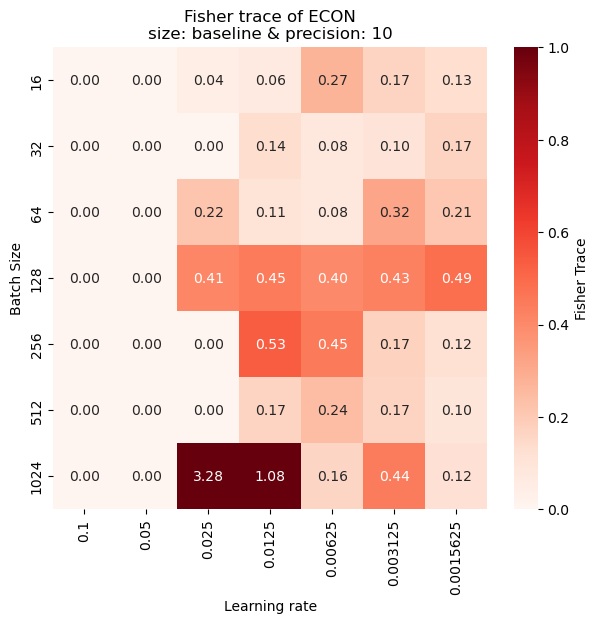

<built-in method type of Tensor object at 0x7fccdf351ef0>
<built-in method type of Tensor object at 0x7fccdf372ea0>
<built-in method type of Tensor object at 0x7fccdf21bc20>
<built-in method type of Tensor object at 0x7fccdf3515e0>
<built-in method type of Tensor object at 0x7fccdf3726d0>
<built-in method type of Tensor object at 0x7fccdf1a3cc0>
<built-in method type of Tensor object at 0x7fccdf372450>
<built-in method type of Tensor object at 0x7fccdf3510e0>
<built-in method type of Tensor object at 0x7fccdf372b30>
<built-in method type of Tensor object at 0x7fccdf21e810>
<built-in method type of Tensor object at 0x7fccdf372e00>
<built-in method type of Tensor object at 0x7fccdf351d10>
<built-in method type of Tensor object at 0x7fccdf21bc70>
<built-in method type of Tensor object at 0x7fccdf34ed60>
<built-in method type of Tensor object at 0x7fccdf351180>
<built-in method type of Tensor object at 0x7fccdf3517c0>
<built-in method type of Tensor object at 0x7fccdf372310>
<built-in meth

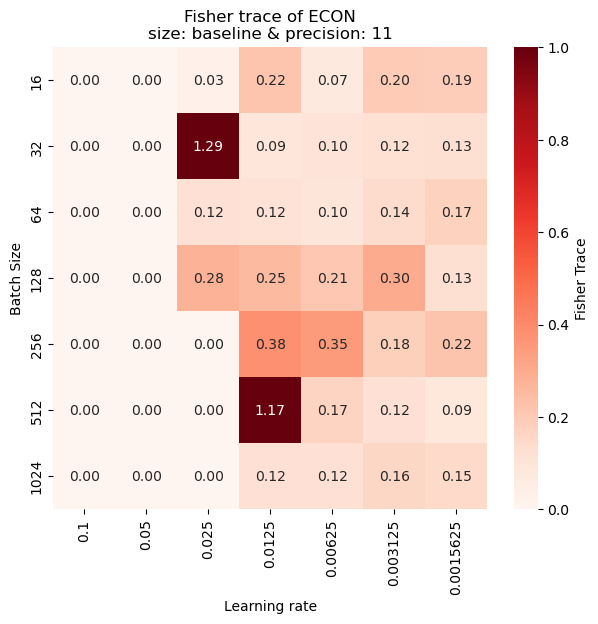

In [7]:
fisher_distribution = []
for p in precisions:
    fisher_matrix = np.zeros((len(batch_sizes), len(learning_rates)))
    for x, bs in enumerate(batch_sizes):
        fisher_dataloader = autoencoder_datamodule.get_data_module(DATASET_DIR, DATASET_FILE, bs)
        for y, lr in enumerate(learning_rates):
            
            # get the performances with and without noise
            mean_emd, _ = econ.get_model_index_and_relative_EMD(DATA_PATH, bs, lr, p, size)
            noise_emd = econ.get_emd_with_noise(DATA_PATH, bs, lr, p, size, noise_type, noise)
            
            # get the model
            model, _ = econ.load_model(DATA_PATH, bs, lr, p, size)
    
            # instantiate the metric
            metric = FIT(model, 
                        fisher_dataloader, 
                        input_spec=(bs, 1, 8, 8),
                        target_layers=ECON_layers)
            
            # load the value from the file
            path = os.path.join(
                DATA_PATH, 
                f'bs{bs}_lr{lr}/ECON_{p}b/{size}/'
            )
            result = -1
            if metric.load_from_file(path):
                result = sum(metric.results['EF_trace_w'])
            
            # build the heatmap matrix
            fisher_matrix[x, y] = result
            
            # build the dataframe for further analysis
            fisher_distribution.append({
                'precision': p, 
                'avg_EF': result,
                'emd': mean_emd,
                'noise_emd': noise_emd,
                'batch_size': str(bs),
                'learning_rate': str(lr),
                'loss': (noise_emd - mean_emd) * 100 / mean_emd,
            })
            
    # plot the heatmaps per precision
    fisher_matrix = pd.DataFrame(fisher_matrix, 
                             index=batch_sizes, 
                             columns=learning_rates)
    plot_2d_heatmap(fisher_matrix, 
                    f'Fisher trace of ECON\nsize: {size} & precision: {p}', 
                    (0, max(max(fisher_matrix), 1)),
                    'Learning rate',
                    'Batch Size',
                    'Fisher Trace',
                    cmap='Reds')
    

In [8]:
fisher_distribution_df = pd.DataFrame(fisher_distribution)
# eport to CSV
fisher_distribution_df.to_csv("./results/econ/fisher.csv", index=False)

## Per layer analysis

In [9]:
MIN_EMD = 3
MAX_LOSS = 50
NUM_PLOT = 3

fisher_distribution_df = fisher_distribution_df.loc[
        (fisher_distribution_df.loss > -0.5) & 
        (fisher_distribution_df.emd < MIN_EMD) # &
        # (ne_distribution_df.loss < MAX_LOSS)
    ]
fisher_distribution_df.sort_values(by='loss', ascending=True, inplace=True)

In [10]:
best_df = fisher_distribution_df.head(NUM_PLOT)
for i in range(NUM_PLOT):
    print('-'*80)
    print('Low loss')
    _, dataloader = autoencoder_datamodule.get_data_module(DATASET_DIR, 
                                                           DATASET_FILE, 
                                                           int(best_df.iloc[i]['batch_size'])).dataloaders()
    print(len(dataloader))
    result = get_estimated_fisher(int(best_df.iloc[i]['batch_size']),
                                   float(best_df.iloc[i]['learning_rate']), 
                                   int(best_df.iloc[i]['precision']),
                                   size,
                                   dataloader)
    print(f"EMD:\t{best_df.iloc[i]['emd']}\n" \
          f"Loss:\t{best_df.iloc[i]['loss']}\n" \
          f"AVG Trace Fisher:\t{best_df.iloc[i]['avg_EF']}")
    plot_fisher_trace_per_layer(result['EF_trace_w'], 
                                     'ECON Fisher trace\n' \
                                     f'{best_df.iloc[i]}')

--------------------------------------------------------------------------------
Low loss
680
<built-in method type of Tensor object at 0x7fcd38d7c3b0>
<built-in method type of Tensor object at 0x7fcce12ccae0>
EMD:	1.7443809111913045
Loss:	-0.2304847494291542
AVG Trace Fisher:	0.04630175232887268


AttributeError: 'numpy.ndarray' object has no attribute 'keys'

<Figure size 1200x600 with 0 Axes>

--------------------------------------------------------------------------------
High loss
Accuracy:	1.3663277626037598
Loss:	252.22089644122613
Network efficiency:	0.4475942992885123


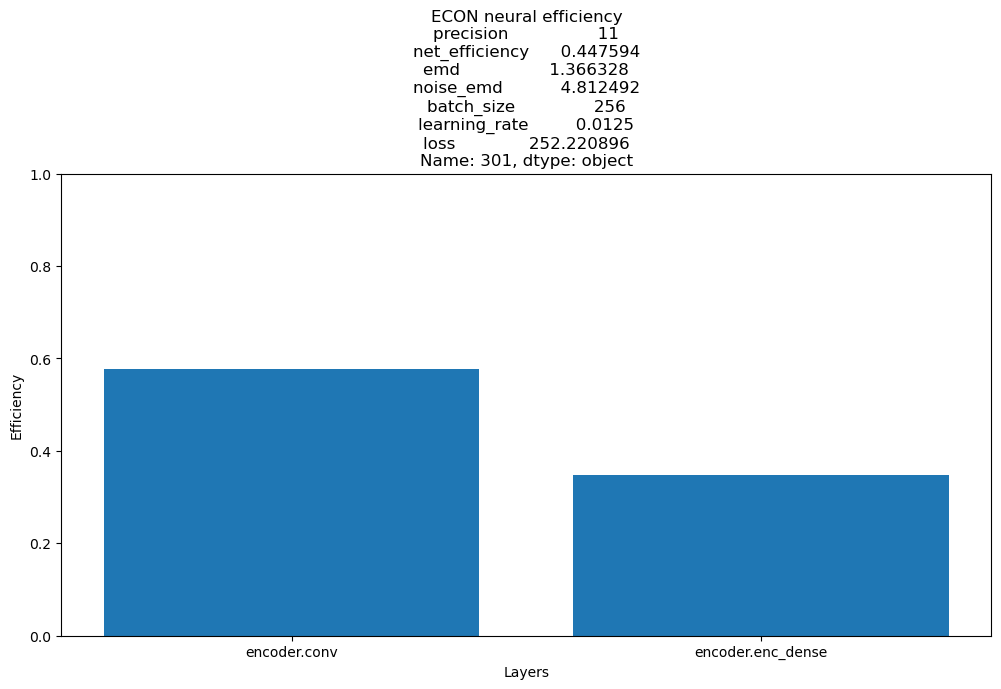

--------------------------------------------------------------------------------
High loss
Accuracy:	1.1998576720555623
Loss:	269.65530552378385
Network efficiency:	0.4588307921757274


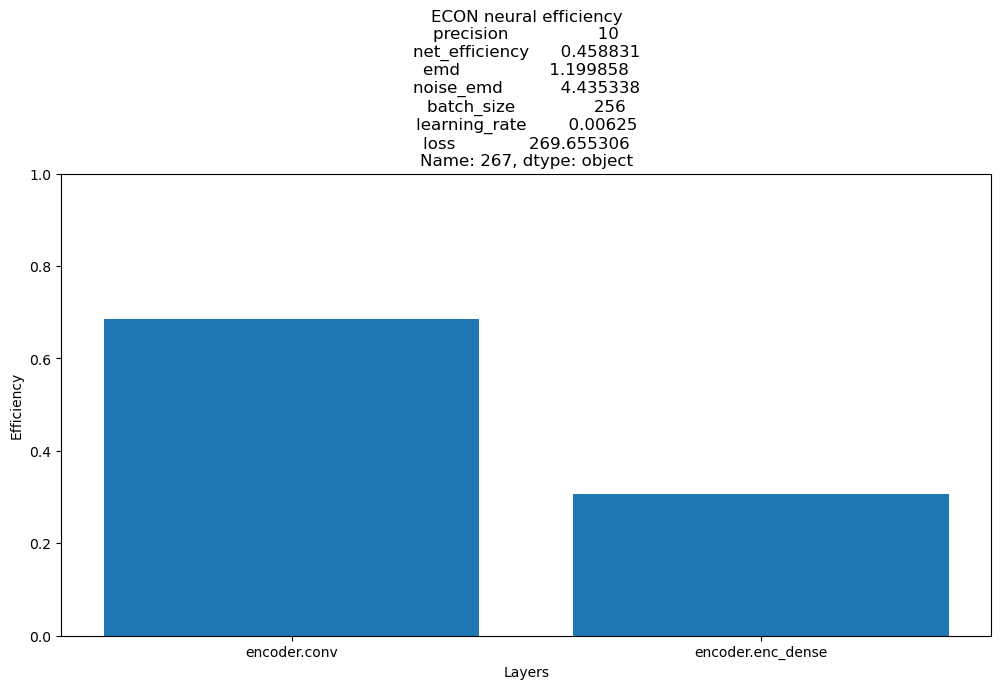

--------------------------------------------------------------------------------
High loss
Accuracy:	1.2699809869130452
Loss:	273.59714379027014
Network efficiency:	0.5712562010228729


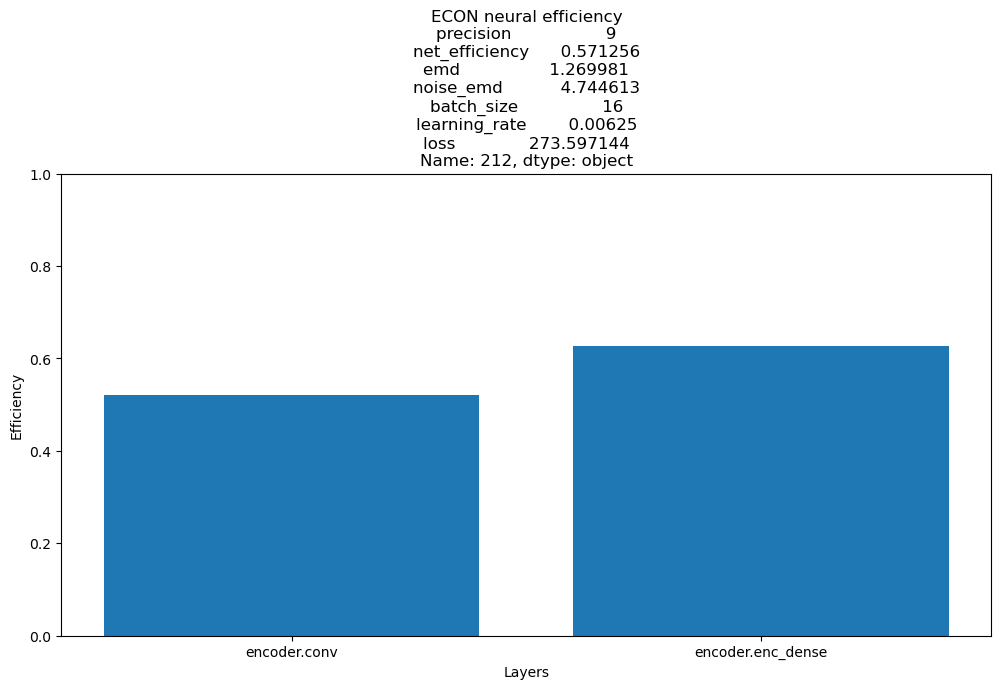

In [ ]:
worst_df = ne_distribution_df.tail(NUM_PLOT)

for i in range(NUM_PLOT):
    print('-'*80)
    print('High loss')
    result = get_neural_efficiency(int(worst_df.iloc[i]['batch_size']),
                                   float(worst_df.iloc[i]['learning_rate']), 
                                   int(worst_df.iloc[i]['precision']),
                                   size,
                                   ne_dataloader,
                                   max_batches=ne_batch_num)
    print(f"Accuracy:\t{worst_df.iloc[i]['emd']}\n" \
          f"Loss:\t{worst_df.iloc[i]['loss']}\n" \
          f"Network efficiency:\t{worst_df.iloc[i]['net_efficiency']}")

    plot_neural_efficiency_per_layer(result['layers_efficiency'], 
                                     'ECON neural efficiency\n' \
                                     f'{worst_df.iloc[i]}')

# Jet Tagger (MLP)
The full precision model achieve 76% of accuracy.

In [ ]:
DATA_PATH="/home/jovyan/checkpoint/"    
DATASET_DIR="../../data/JTAG"
DATASET_FILE=DATASET_DIR + "/processed_dataset.h5"

JTAG_layers = ['model.dense_1', 'model.dense_2', 'model.dense_3', 'model.dense_4']
# we do not consider extreme low precisions due to their performances
precisions = [4, 5, 6, 7, 8, 9, 10, 11]
learning_rates = [0.1, 0.05, 0.025, 0.0125, 0.00625, 0.003125, 0.0015625]

In [ ]:
def get_data_module(batch_size, num_workers=12):
    '''
    Method used to get the data modules used during the tests
    '''
    data_module = JetDataModule(
        data_dir=DATASET_DIR,
        data_file=os.path.join(DATASET_DIR, DATASET_FILE),
        batch_size=batch_size,
        num_workers=num_workers)
    
    # check if we have processed the data
    if not os.path.exists(os.path.join(DATASET_DIR, DATASET_FILE)):
        print('Processing the data...')
        data_module.process_data(save=True)

    data_module.setup(0)
    return data_module


def load_model(batch_size, learning_rate, precision):
    '''
    Method used to get the model and the relative accuracy
    '''
    accuracy, idx = get_model_index_and_relative_accuracy(batch_size, learning_rate, precision)
    model_path = DATA_PATH + f'bs{batch_size}_lr{learning_rate}/JTAG_{precision}b/net_{idx}_best.pkl'
    
    # load the model
    model = JetTagger(
        quantize=(precision < 32),
        precision=[
            precision,
            precision,
            precision+3
        ],
        learning_rate=learning_rate,
    )
    
    # to set the map location
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    model(torch.randn((16, 16)))  # Update tensor shapes 
    model_param = torch.load(model_path, map_location=device)
    model.load_state_dict(model_param['state_dict'])
    
    return model, accuracy


def get_model_index_and_relative_accuracy(batch_size, learning_rate, precision, num_tests=5):
    '''
    Return the average EMDs achieved by the model and the index of best experiment
    '''
    performances = []
    max_acc = 0
    max_acc_index = 0
    for i in range (1, num_tests+1):
        file_path = DATA_PATH + f'bs{batch_size}_lr{learning_rate}/' \
                    f'JTAG_{precision}b/accuracy_{i}.txt'
        try:
            jtag_file = open(file_path)
            jtag_text = jtag_file.read()
            accuracy = ast.literal_eval(jtag_text)
            accuracy = accuracy[0]['test_acc']
            performances.append(accuracy)
            if accuracy >= max_acc:
                max_acc = accuracy
                max_acc_index = i
            jtag_file.close()
        except Exception as e:
            # warnings.warn("Warning: " + file_path + " not found!")
            continue
        
    if len(performances) == 0:
        # warnings.warn(f"Attention: There is no accuracy value for the model: " \
        #               f"bs{batch_size}_lr{learning_rate}/JTAG_{precision}b")
        return
    
    return mean(performances), max_acc_index


def get_accuracy_with_noise(batch_size, learning_rate, precision, noise_type, percentage):
    '''
    Return the accuracy achieved by the Model with a certain level of noise
    '''

    file_path = DATA_PATH + f'bs{batch_size}_lr{learning_rate}/' \
                f'JTAG_{precision}b/accuracy_{noise_type}_{percentage}.txt'
    noise_acc = -1
    try:
        acc_file = open(file_path)
        acc_text = acc_file.read()
        acc = ast.literal_eval(acc_text)
        noise_acc = acc[0]['test_acc']
        acc_file.close()
    except Exception as e:
        # warnings.warn("Warning: " + file_path + " not found!")
        return 0
    return noise_acc


def get_neural_efficiency(batch_size, 
                          learning_rate, 
                          precision, 
                          dataloader,
                          load=True,
                          max_batches=None,
                          beta=2):
    '''
    Get the value of the Neural Efficiency
    '''
    
    # path to the directory
    path = os.path.join(
        DATA_PATH, 
        f'bs{batch_size}_lr{learning_rate}/JTAG_{precision}b/'
    )
    
    # load the model and the performance
    model, acc =load_model(batch_size, learning_rate, precision)
    
    # instantiate the metric
    metric = NeuralEfficiency(model, 
                              dataloader, 
                              performance=acc, 
                              max_batches=max_batches,
                              target_layers=JTAG_layers)
    
    # try to load the result
    if load:
        if metric.load_from_file(path):
            return metric.results
        else:
            print("Information not stored in ", path)
    
    # compute the result and store it
    result = metric.compute(beta=beta)
    metric.save_on_file(path=path)
    
    return result

## Results

Neural efficiency require to process an input sample per time. 


In [ ]:
noise = 5 # 5 10 15 20
noise_type = 'gaussian'
ne_dataloader = get_data_module(1).test_dataloader()

Loaded shaped data shape (train): (630000, 16)
Loaded shaped data datatype (train): float32
Loaded shaped data shape (val): (240000, 16)
Loaded shaped data datatype (val): float32


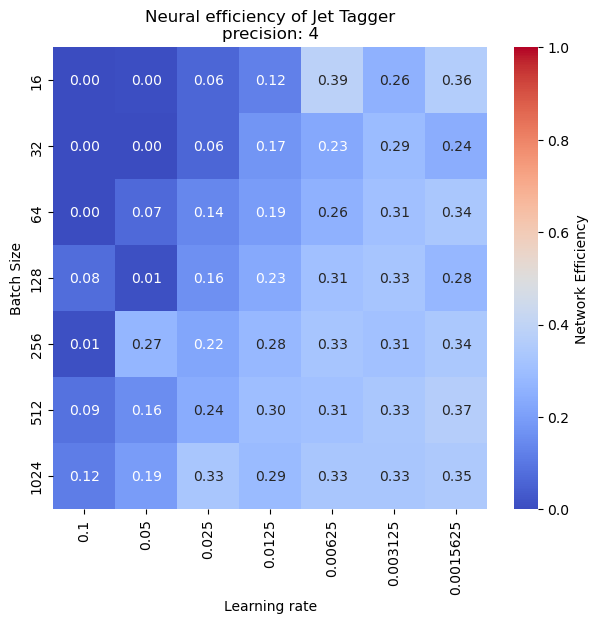

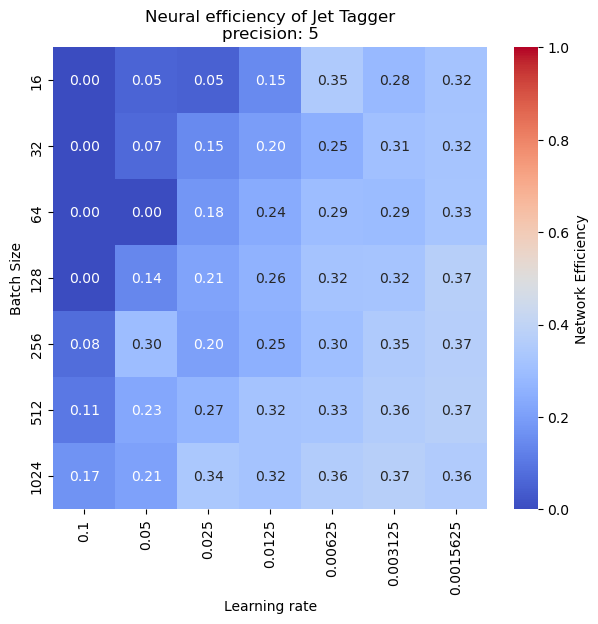

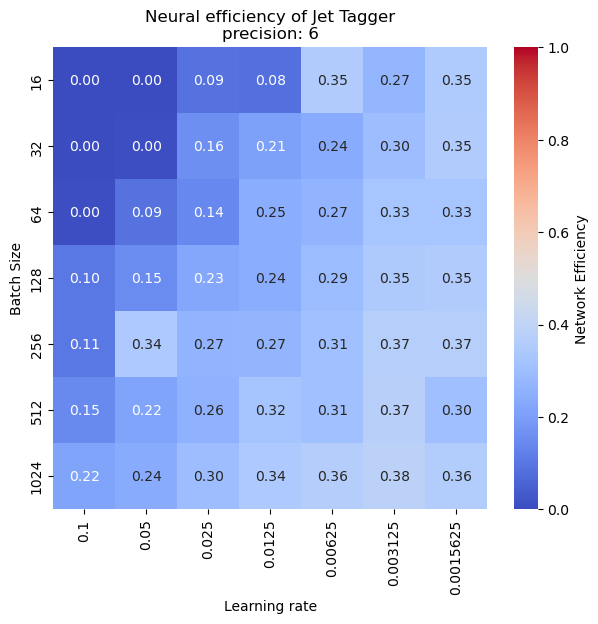

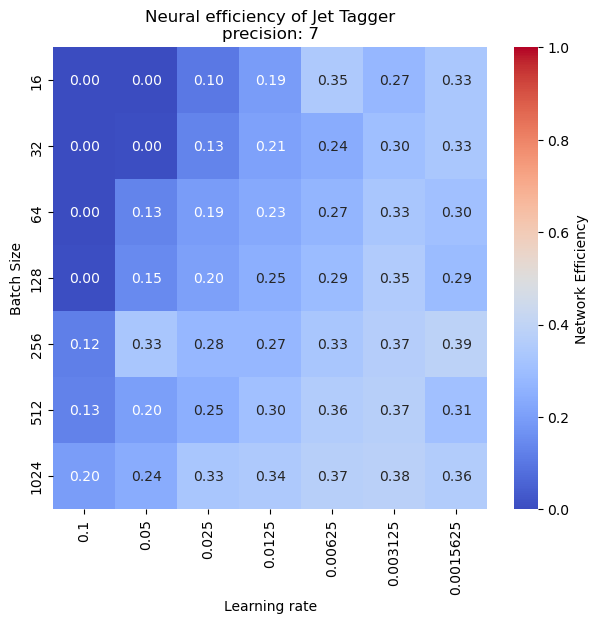

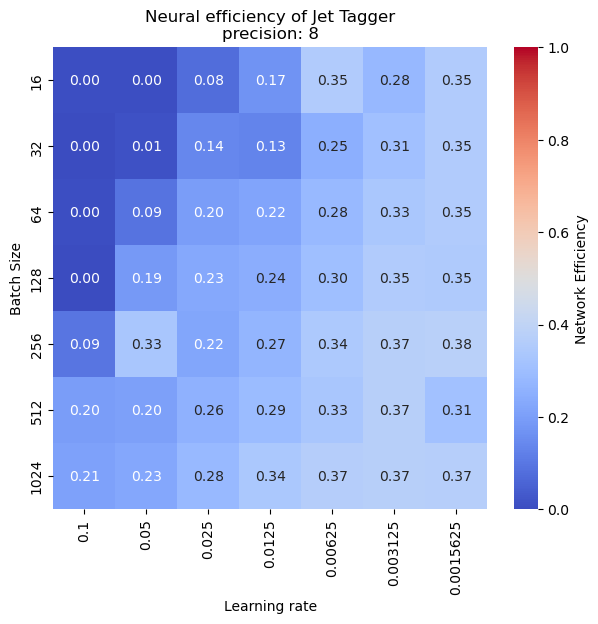

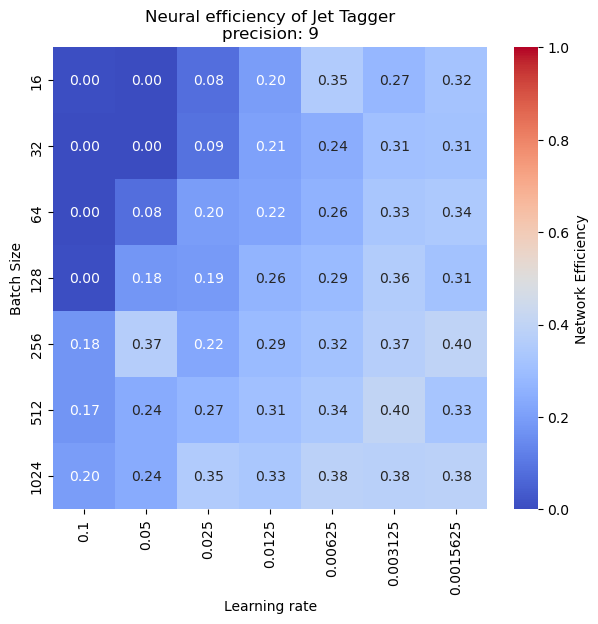

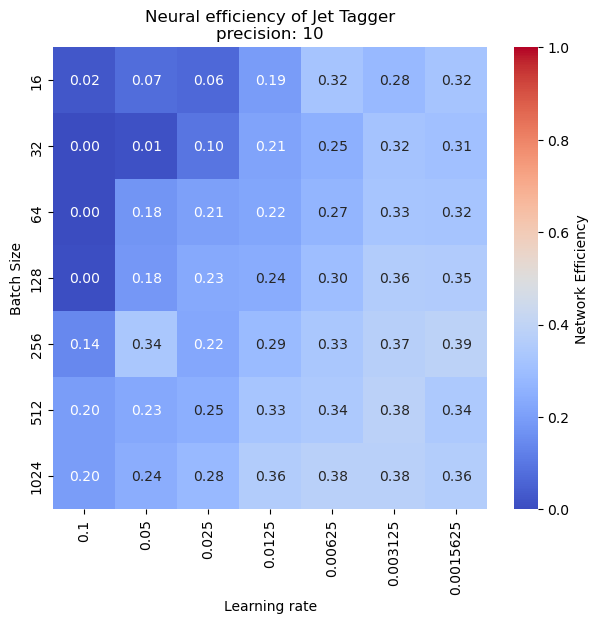

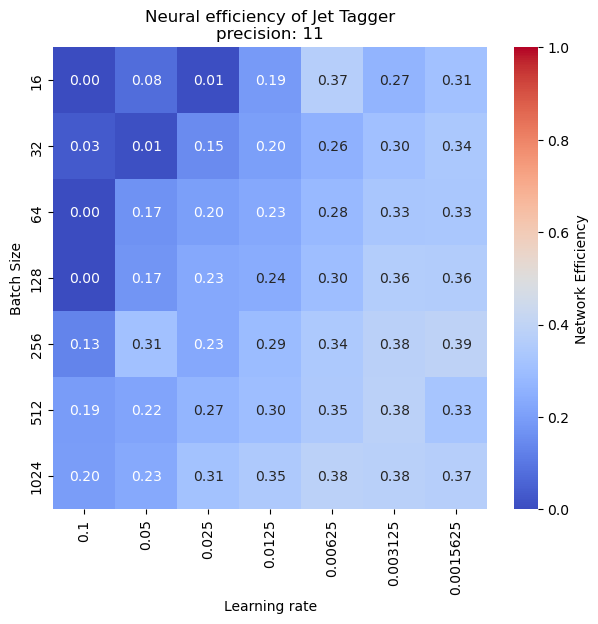

In [ ]:
ne_distribution = []
for p in precisions:
    NE_matrix = np.zeros((len(batch_sizes), len(learning_rates)))
    for x, bs in enumerate(batch_sizes):
        for y, lr in enumerate(learning_rates):
            
            # get the performances with and without noise
            mean_acc, _ = get_model_index_and_relative_accuracy(bs, lr, p)
            noise_acc = get_accuracy_with_noise(bs, lr, p, noise_type, noise)
            
            # get the model
            model, _ = load_model(bs, lr, p)
            
            # instantiate the metric
            metric = NeuralEfficiency(model, 
                                      ne_dataloader, 
                                      performance=mean_acc, 
                                      max_batches=ne_batch_num,
                                      target_layers=JTAG_layers)
            
            # load the value from the file
            path = os.path.join(
                DATA_PATH, 
                f'bs{bs}_lr{lr}/JTAG_{p}b/'
            )
            result = -1
            if metric.load_from_file(path):
                result = metric.results['network_efficiency']
                
            # build the heatmap matrix
            NE_matrix[x, y] = result
            
            # build the dataframe for further analysis
            ne_distribution.append({
                'precision': p, 
                'net_efficiency': result,
                'accuracy': mean_acc,
                'noise_acc': noise_acc,
                'batch_size': str(bs),
                'learning_rate': str(lr),
                'loss': (mean_acc - noise_acc) * 100 / mean_acc,
            })
            
    # plot the heatmaps per precision
    NE_matrix = pd.DataFrame(NE_matrix, 
                             index=batch_sizes, 
                             columns=learning_rates)
    plot_2d_heatmap(NE_matrix, 
                    f'Neural efficiency of Jet Tagger\nprecision: {p}', 
                    (0, 1),
                    'Learning rate',
                    'Batch Size',
                    'Network Efficiency',
                    cmap='coolwarm')
    


In [ ]:
ne_distribution_df = pd.DataFrame(ne_distribution)

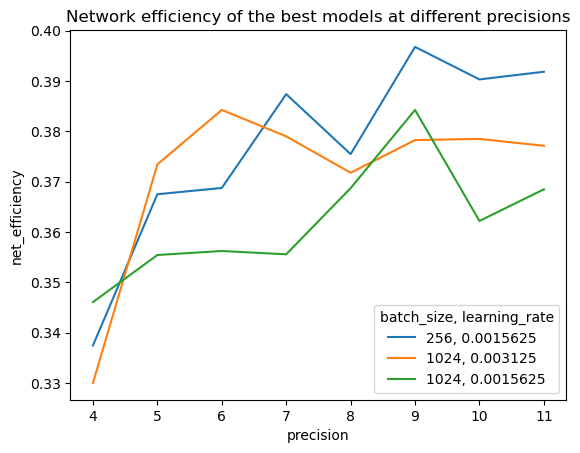

In [ ]:
top_5_df = ne_distribution_df.loc[
    (ne_distribution_df.batch_size == '1024') & (ne_distribution_df.learning_rate == '0.0015625') |
    (ne_distribution_df.batch_size == '256') & (ne_distribution_df.learning_rate == '0.0015625') |
    (ne_distribution_df.batch_size == '256') & (ne_distribution_df.learning_rate == '0.0015625') |
    (ne_distribution_df.batch_size == '1024') & (ne_distribution_df.learning_rate == '0.0015625') |
    (ne_distribution_df.batch_size == '1024') & (ne_distribution_df.learning_rate == '0.003125')
    ]

hue = top_5_df[['batch_size', 'learning_rate']] \
        .apply(lambda row: f"{row.batch_size}, {row.learning_rate}", axis=1)
hue.name = 'batch_size, learning_rate'

sns.lineplot(top_5_df, x='precision', y='net_efficiency', hue=hue)
plt.title("Network efficiency of the best models at different precisions")
plt.show()

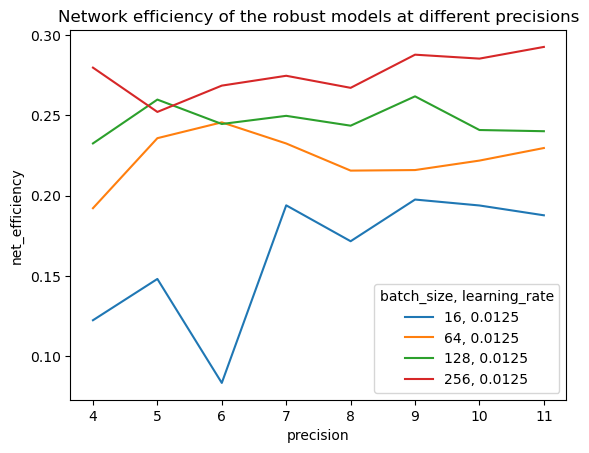

In [ ]:
top_5_df = ne_distribution_df.loc[
    (ne_distribution_df.batch_size == '16') & (ne_distribution_df.learning_rate == '0.0125') |
    (ne_distribution_df.batch_size == '64') & (ne_distribution_df.learning_rate == '0.0125') |
    (ne_distribution_df.batch_size == '256') & (ne_distribution_df.learning_rate == '0.0125') |
    (ne_distribution_df.batch_size == '16') & (ne_distribution_df.learning_rate == '0.03125') |
    (ne_distribution_df.batch_size == '128') & (ne_distribution_df.learning_rate == '0.0125')
    ]

hue = top_5_df[['batch_size', 'learning_rate']] \
        .apply(lambda row: f"{row.batch_size}, {row.learning_rate}", axis=1)
hue.name = 'batch_size, learning_rate'

sns.lineplot(top_5_df, x='precision', y='net_efficiency', hue=hue)
plt.title("Network efficiency of the robust models at different precisions")
plt.show()

## Per layer analysis

In [ ]:
MAX_LOSS = 50
MIN_ACCURACY = 0.72
NUM_PLOT = 3

ne_distribution_df = ne_distribution_df.loc[
        (ne_distribution_df.loss > -0.5) & 
        (ne_distribution_df.accuracy > MIN_ACCURACY) # &
        # (ne_distribution_df.loss < MAX_LOSS)
    ]
ne_distribution_df.sort_values(by='loss', ascending=True, inplace=True)

--------------------------------------------------------------------------------
Low loss
Accuracy:	0.7236066579818725
Loss:	0.03949883399691837
Network efficiency:	0.19751480003633723


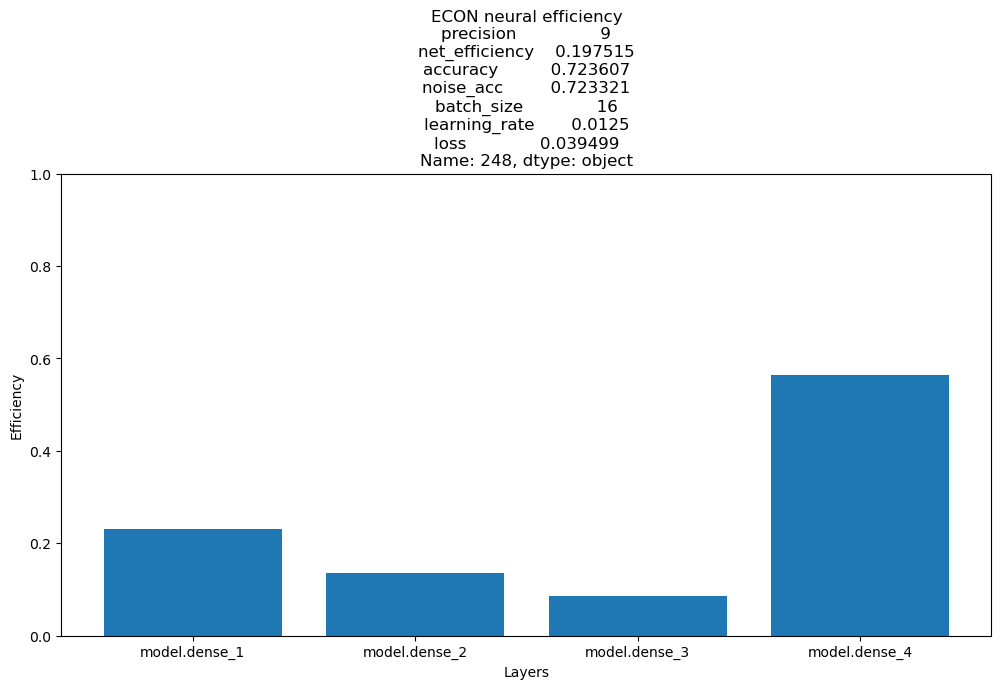

--------------------------------------------------------------------------------
Low loss
Accuracy:	0.7275750041007996
Loss:	0.329860290465477
Network efficiency:	0.14183045828436225


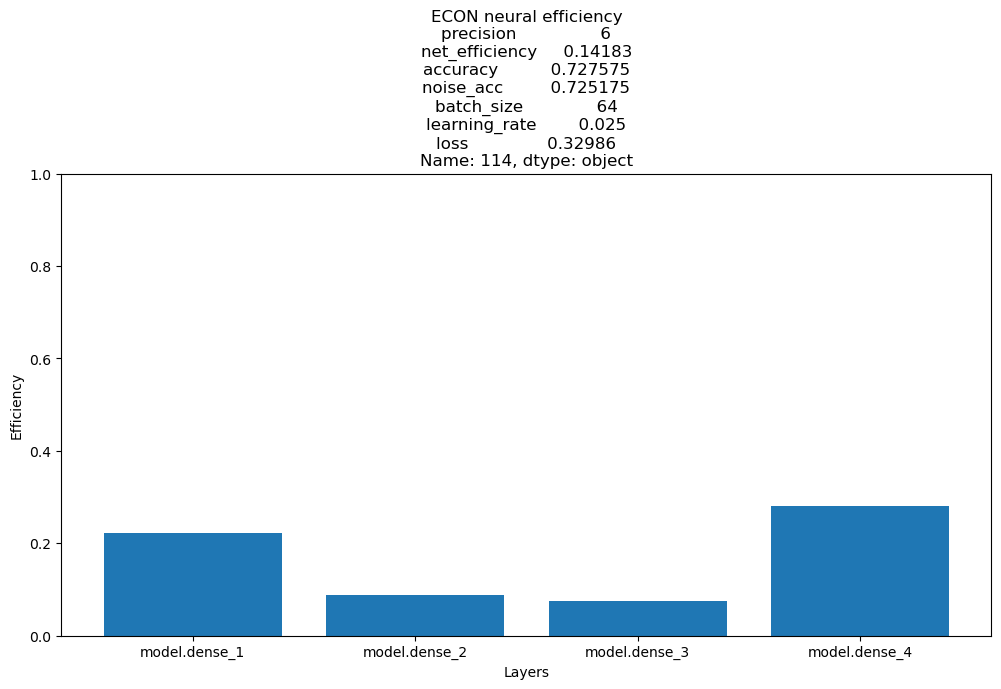

--------------------------------------------------------------------------------
Low loss
Accuracy:	0.724667489528656
Loss:	0.40201834148536963
Network efficiency:	0.2796946161622169


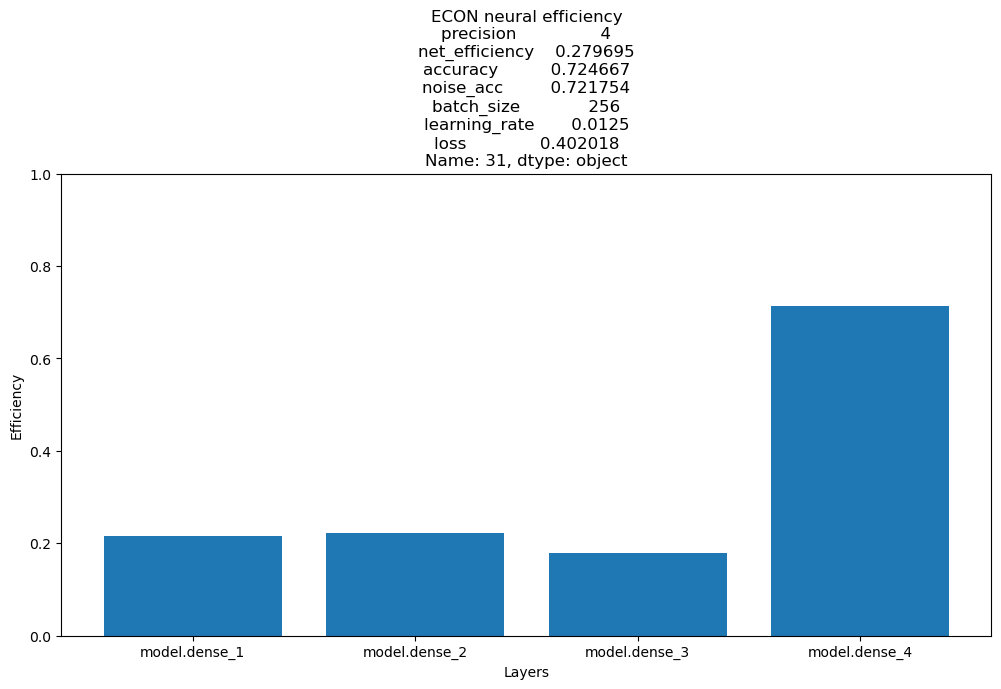

In [ ]:
best_df = ne_distribution_df.head(NUM_PLOT)
for i in range(NUM_PLOT):
    print('-'*80)
    print('Low loss')
    result = get_neural_efficiency(int(best_df.iloc[i]['batch_size']),
                                   float(best_df.iloc[i]['learning_rate']), 
                                   int(best_df.iloc[i]['precision']),
                                   ne_dataloader,
                                   max_batches=ne_batch_num)
    print(f"Accuracy:\t{best_df.iloc[i]['accuracy']}\n" \
          f"Loss:\t{best_df.iloc[i]['loss']}\n" \
          f"Network efficiency:\t{best_df.iloc[i]['net_efficiency']}")

    plot_neural_efficiency_per_layer(result['layers_efficiency'], 
                                     'ECON neural efficiency\n' \
                                     f'{best_df.iloc[i]}')

--------------------------------------------------------------------------------
High loss
Accuracy:	0.760420823097229
Loss:	73.5820620453879
Network efficiency:	0.2680655385131669


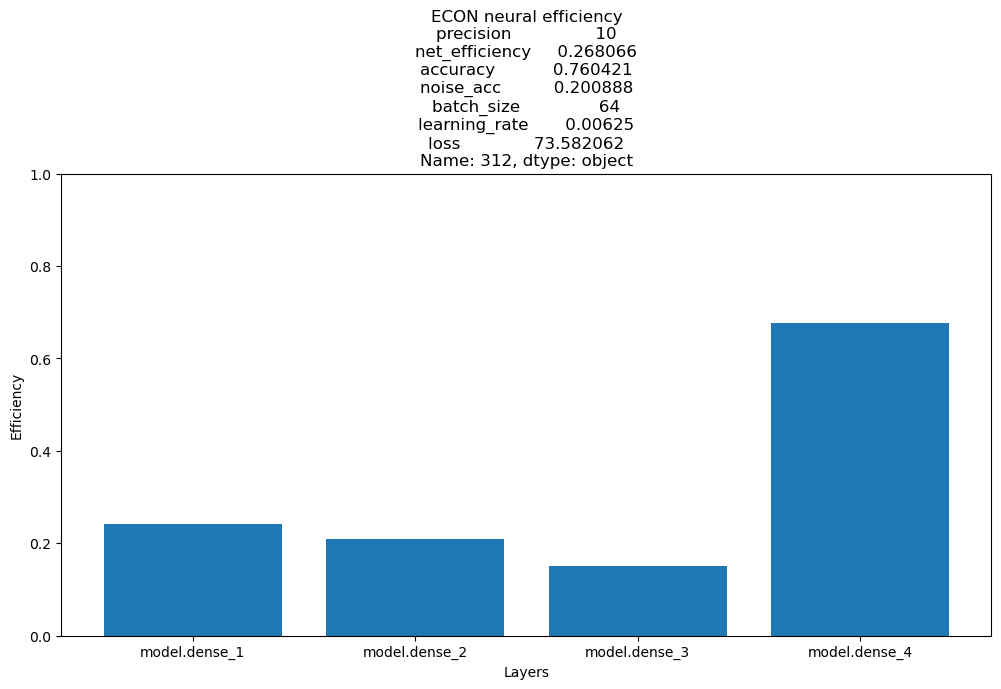

--------------------------------------------------------------------------------
High loss
Accuracy:	0.7595208406448364
Loss:	73.67528917779174
Network efficiency:	0.2668673578518543


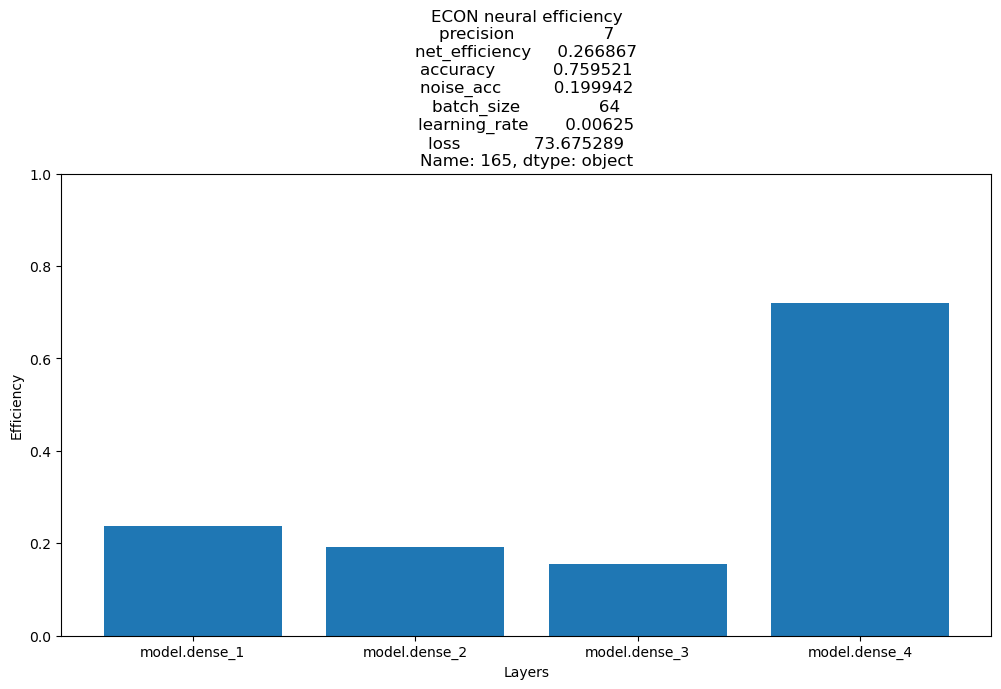

--------------------------------------------------------------------------------
High loss
Accuracy:	0.7611416697502136
Loss:	73.9585267415526
Network efficiency:	0.28256395314316163


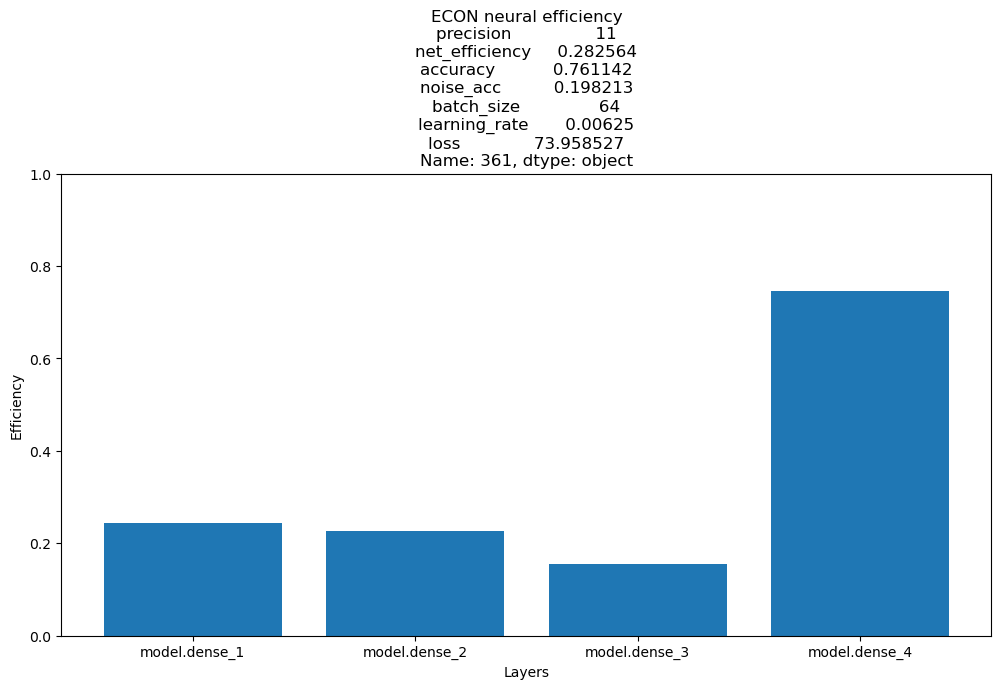

In [ ]:
worst_df = ne_distribution_df.tail(NUM_PLOT)

for i in range(NUM_PLOT):
    print('-'*80)
    print('High loss')
    result = get_neural_efficiency(int(worst_df.iloc[i]['batch_size']),
                                   float(worst_df.iloc[i]['learning_rate']), 
                                   int(worst_df.iloc[i]['precision']),
                                   ne_dataloader,
                                   max_batches=ne_batch_num)
    print(f"Accuracy:\t{worst_df.iloc[i]['accuracy']}\n" \
          f"Loss:\t{worst_df.iloc[i]['loss']}\n" \
          f"Network efficiency:\t{worst_df.iloc[i]['net_efficiency']}")

    plot_neural_efficiency_per_layer(result['layers_efficiency'], 
                                     'ECON neural efficiency\n' \
                                     f'{worst_df.iloc[i]}')